Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 0.07293945843750296
************
MAPE-Testset: 0.21785117799423429
************


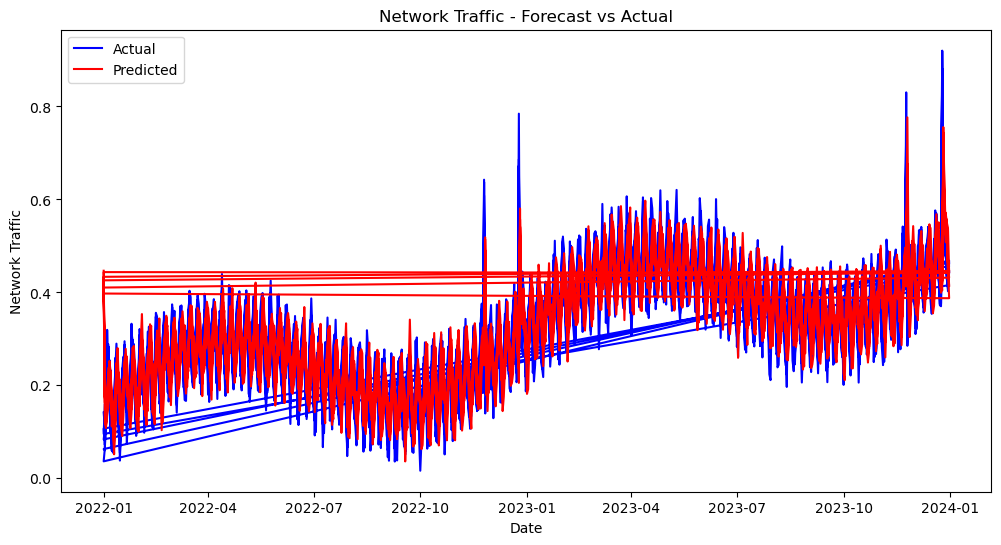

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Train the Simple Exponential Smoothing model
model = SimpleExpSmoothing(data1)
model_fit = model.fit(smoothing_level=0.8)  # Adjust the smoothing level as needed

# Forecast using the trained SES model
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
print("************")
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
print("************")

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(data1.flatten()[:len(y_test)], index=df.index[-len(y_test):]), 
      pd.Series(y_pred.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual", "Date", "Network Traffic")

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(y_pred, [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Plot actual vs predicted (original scale)
graph(pd.Series(actual_traffic_oriA.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Forecast future values
forecast_steps = 3
forecast = model_fit.predict(len(data1), len(data1) + forecast_steps - 1)

fTestNormTable = conversionSingle(forecast, ["Forecast"])
forecast_traffic_ori = Ms.inverse_transform(fTestNormTable)
forecast_traffic_oriF = conversionSingle(forecast_traffic_ori, ["Forecast"])

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\SES_Forecast.csv"
forecast_traffic_oriF.to_csv(forecast_file_path, index=False)

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast_traffic_oriF.flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")


Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 0.07293945843750296
************
MAPE-Testset: 0.21785117799423429
************


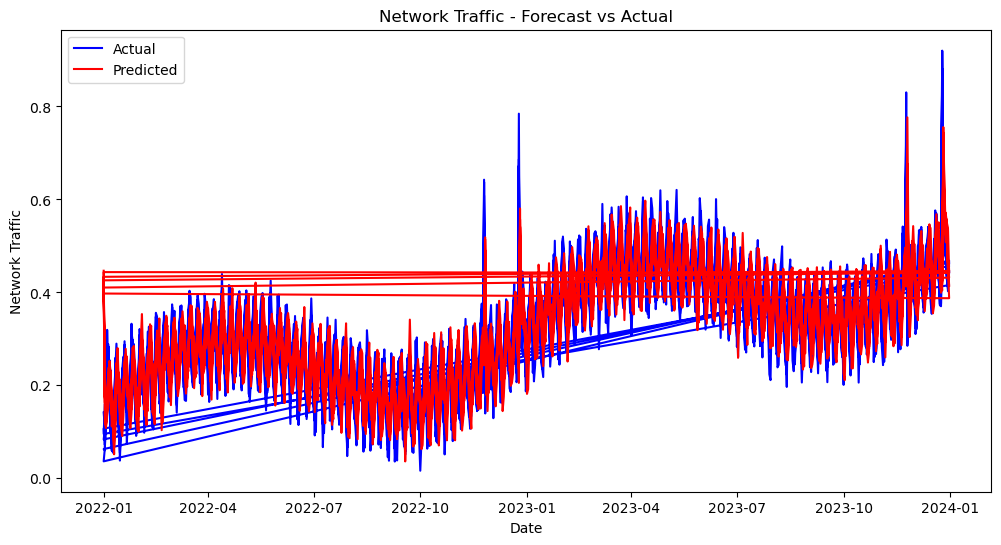

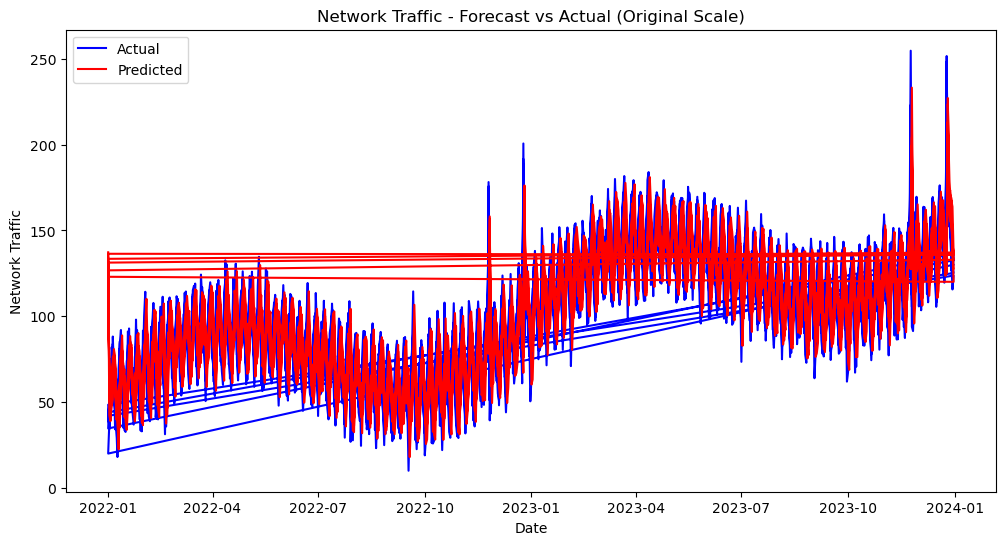

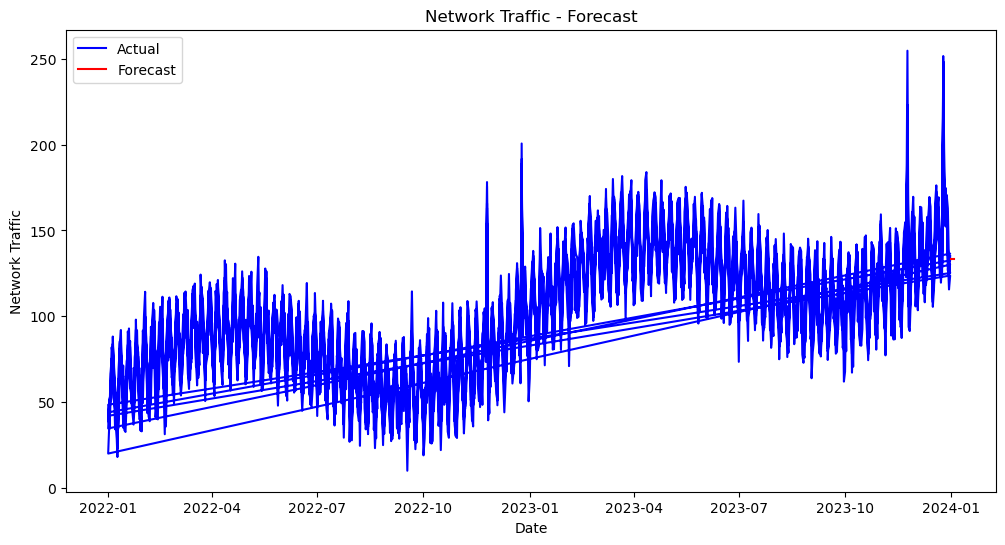

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Train the Simple Exponential Smoothing model
model = SimpleExpSmoothing(data1)
model_fit = model.fit(smoothing_level=0.8)  # Adjust the smoothing level as needed

# Forecast using the trained SES model
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(y_test, y_pred, squared=False))
print("************")
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, y_pred))
print("************")

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(data1.flatten()[:len(y_test)], index=df.index[-len(y_test):]), 
      pd.Series(y_pred.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual", "Date", "Network Traffic")

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(y_pred, [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Plot actual vs predicted (original scale)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.values.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Forecast future values
forecast_steps = 3
forecast = model_fit.predict(len(data1), len(data1) + forecast_steps - 1)

fTestNormTable = conversionSingle(forecast, ["Forecast"])
forecast_traffic_ori = Ms.inverse_transform(fTestNormTable)
forecast_traffic_oriF = conversionSingle(forecast_traffic_ori, ["Forecast"])

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\SES_Forecast.csv"
forecast_traffic_oriF.to_csv(forecast_file_path, index=False)

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast_traffic_oriF.values.flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")


In [3]:
# Forecast for the next 30 days
forecast_steps = 30
forecast = model_fit.predict(len(data1_scaled), len(data1_scaled) + forecast_steps - 1)

# Evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print("RMSE-Testset:", mean_squared_error(y_test, model_fit.fittedvalues[-len(y_test):], squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(y_test, model_fit.fittedvalues[-len(y_test):]))

# Convert scaled data to original scale
actual_traffic_oriA = Ms.inverse_transform(y_test)
predicted_traffic_oriP = Ms.inverse_transform(model_fit.fittedvalues[-len(y_test):].reshape(-1, 1))
forecast_traffic_oriF = Ms.inverse_transform(forecast.reshape(-1, 1))

# Save forecast results to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\forecast_30_days.csv"
pd.DataFrame(forecast_traffic_oriF, columns=['Forecast']).to_csv(forecast_file_path, index=False)

# Plot results
graph(pd.Series(actual_traffic_oriA.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.flatten(), index=df.index[-len(y_test):]),
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

graph(pd.Series(actual_traffic_oriA.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(forecast_traffic_oriF.flatten(), index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')),
      "Actual", "Forecast", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Print forecast
print(forecast_traffic_oriF)

NameError: name 'data1_scaled' is not defined

Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 21.184975797658165
MAPE-Testset: 0.1905928355732897


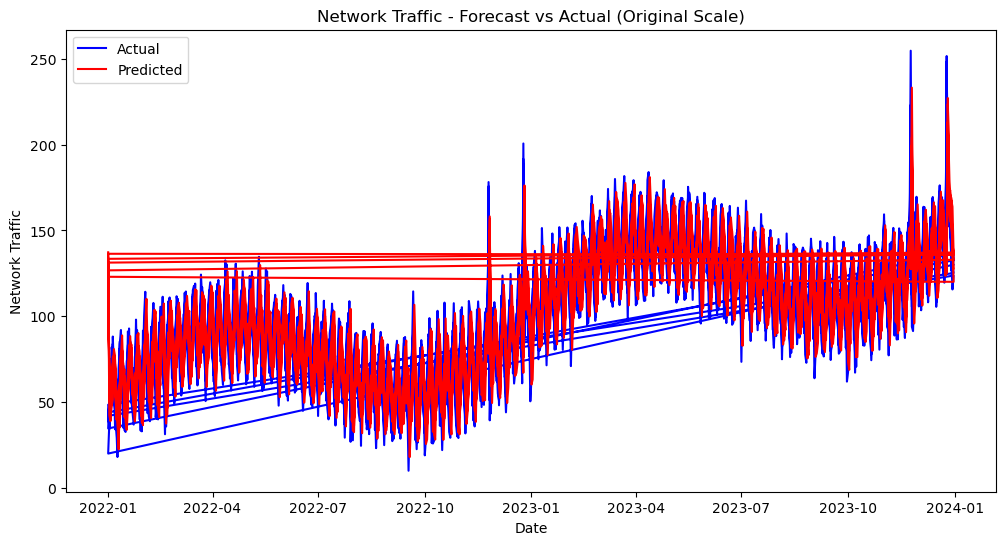

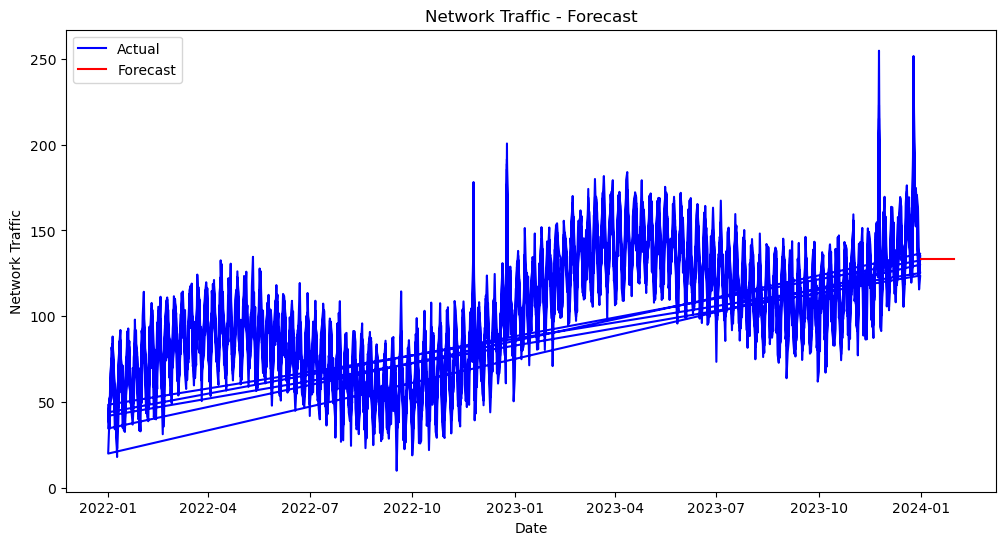

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Train the Simple Exponential Smoothing model
model = SimpleExpSmoothing(data1)
model_fit = model.fit(smoothing_level=0.8)  # Adjust the smoothing level as needed

# Forecast using the trained SES model
forecast_steps = 30
forecast = model_fit.predict(len(data1), len(data1) + forecast_steps - 1)

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(model_fit.fittedvalues[-len(y_test):], [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(actual_traffic_ori, predicted_traffic_ori, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(actual_traffic_ori, predicted_traffic_ori))

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.values.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(Ms.inverse_transform(forecast.reshape(-1, 1)).flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\SES_Forecast.csv"
forecast_series.to_csv(forecast_file_path, header=['Forecast'])


Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 23.241375569639104
MAPE-Testset: 0.20887000978025783


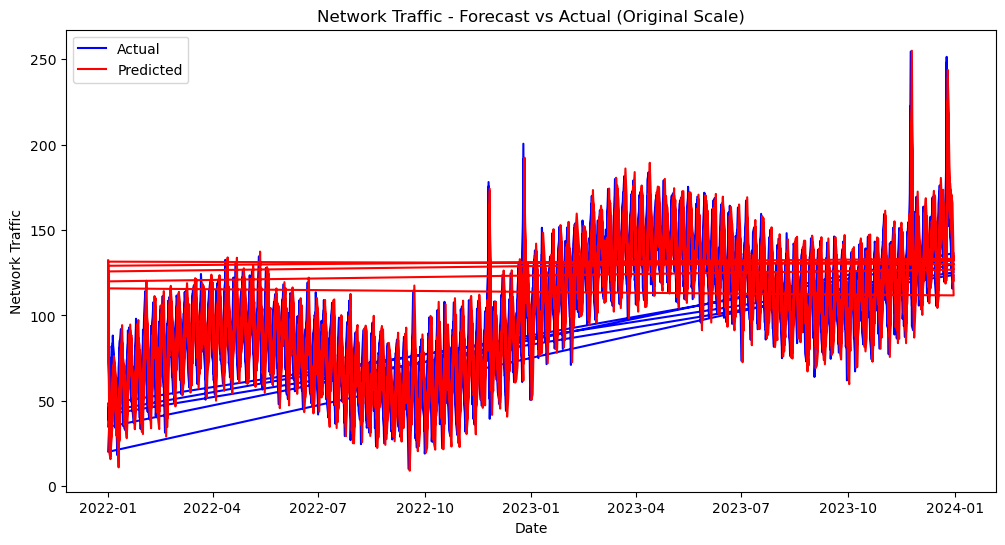

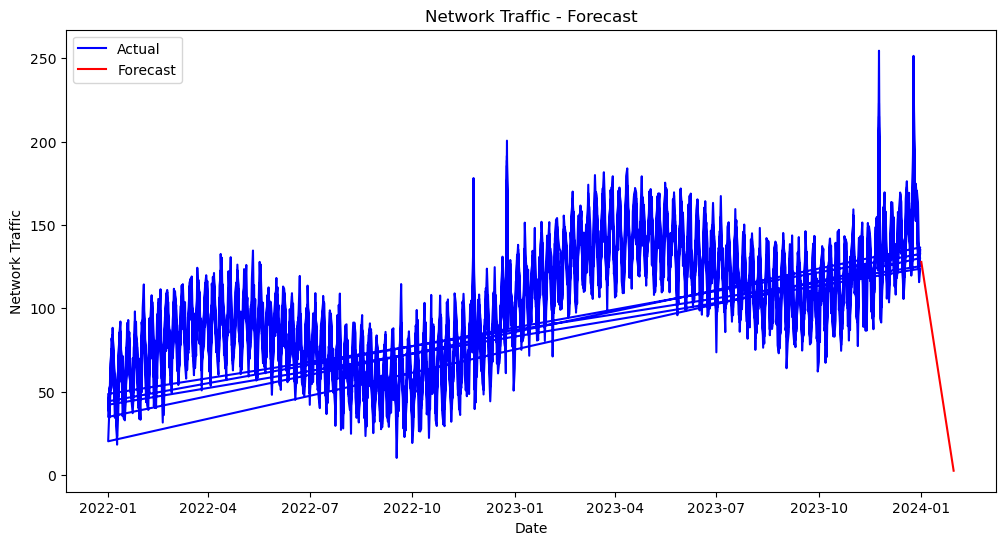

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Train Holt's Linear Trend Model
model = Holt(data1).fit(smoothing_level=0.8, smoothing_trend=0.2)  # Adjust smoothing parameters as needed

# Forecast using the trained Holt model
forecast_steps = 30
forecast = model.predict(start=len(data1), end=len(data1) + forecast_steps - 1)

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(model.fittedvalues[-len(y_test):], [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(actual_traffic_ori, predicted_traffic_ori, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(actual_traffic_ori, predicted_traffic_ori))

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.values.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(Ms.inverse_transform(forecast.reshape(-1, 1)).flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\Holt_Forecast.csv"
forecast_series.to_csv(forecast_file_path, header=['Forecast'])


Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 13.642382704056105
MAPE-Testset: 0.12500310498896555


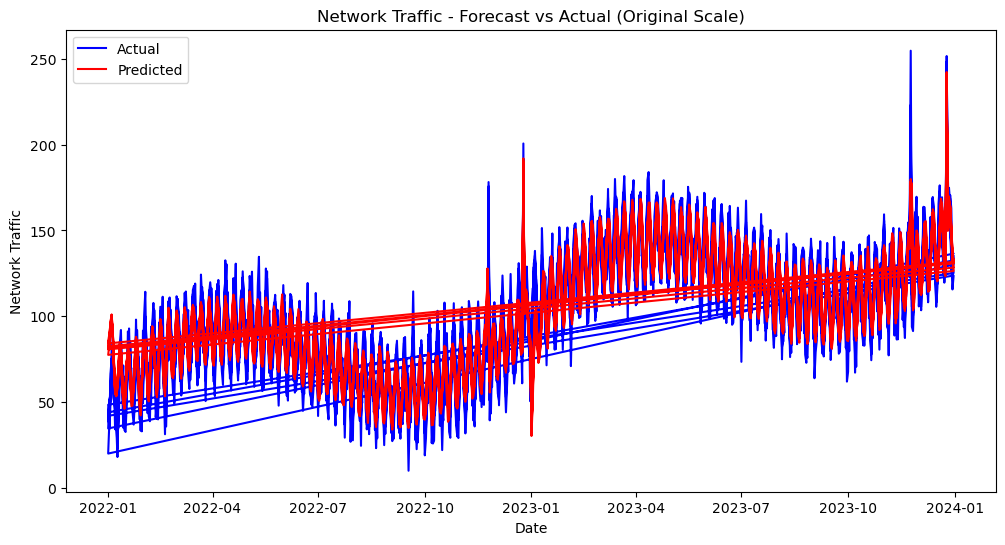

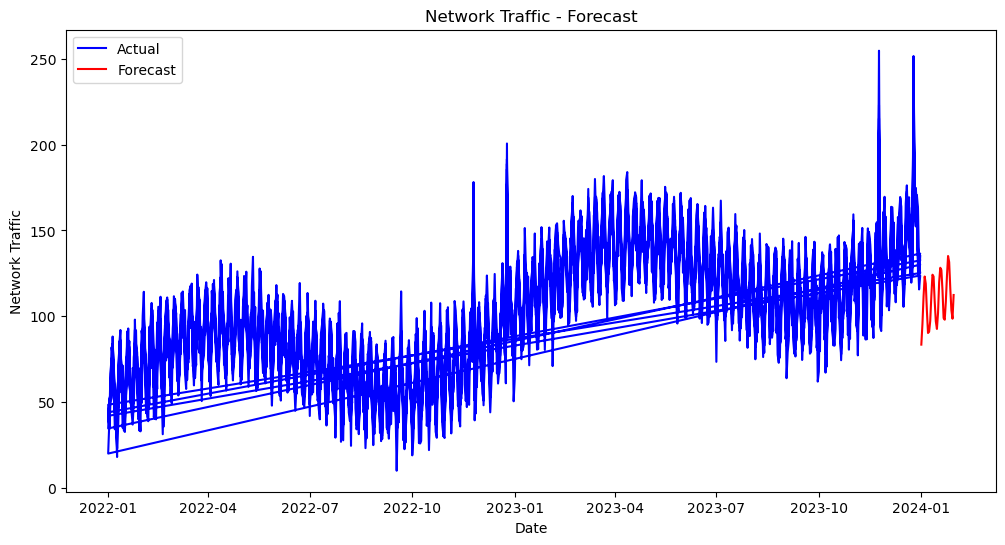

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Determine seasonality period (assuming daily data with yearly seasonality)
seasonal_period = 365  # Adjust this based on your data frequency and seasonality

# Train Holt-Winters Seasonal Model
model = ExponentialSmoothing(
    data1,
    trend='add',
    seasonal='add',
    seasonal_periods=seasonal_period
).fit()

# Forecast using the trained Holt-Winters model
forecast_steps = 30
forecast = model.predict(start=len(data1), end=len(data1) + forecast_steps - 1)

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(model.fittedvalues[-len(y_test):], [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(actual_traffic_ori, predicted_traffic_ori, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(actual_traffic_ori, predicted_traffic_ori))

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.values.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(Ms.inverse_transform(forecast.reshape(-1, 1)).flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\Holt_Winters_Forecast.csv"
forecast_series.to_csv(forecast_file_path, header=['Forecast'])


Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Len: (21900, 1)
Training size: 17520
X_train length: (17520, 1)
X_test length: (4380, 1)
y_train length: (17520, 1)
y_test length: (4380, 1)
RMSE-Testset: 13.642382704056105
MAPE-Testset: 0.12500310498896555


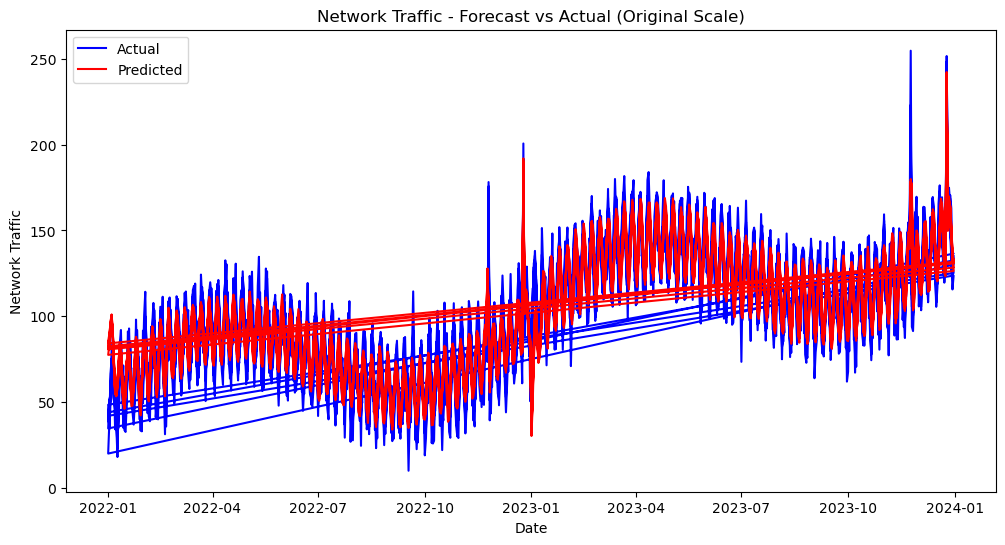

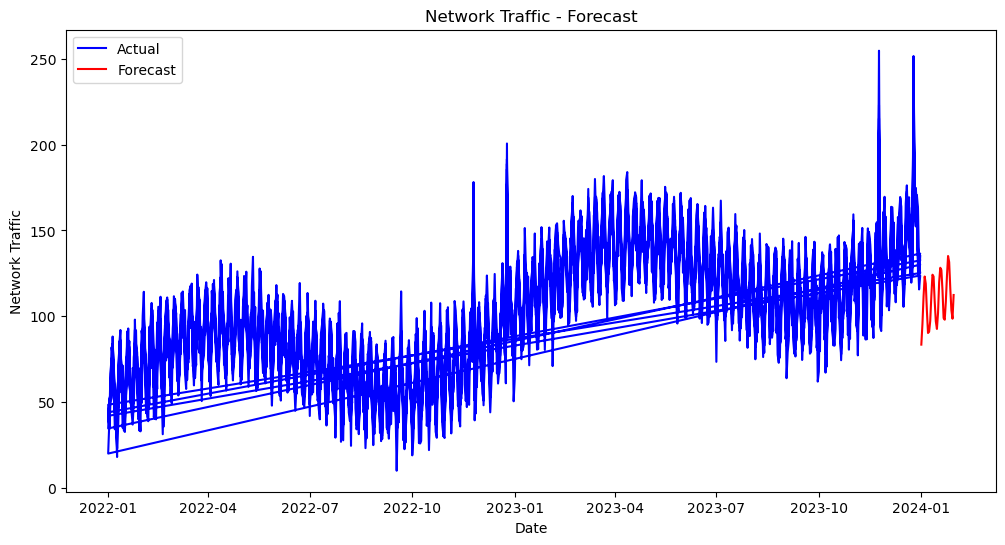

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target column
column = "Network_Traffic"

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[[column]])
print("Len:", data1.shape)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

# Determine seasonality period (assuming daily data with yearly seasonality)
seasonal_period = 365  # Adjust this based on your data frequency and seasonality

# Train Holt-Winters Seasonal Model
model = ExponentialSmoothing(
    data1,
    trend='add',
    seasonal='add',
    seasonal_periods=seasonal_period
).fit()

# Forecast using the trained Holt-Winters model
forecast_steps = 30
forecast = model.predict(start=len(data1), end=len(data1) + forecast_steps - 1)

# Convert normalized predictions back to original scale
def conversionSingle(data, columns):
    return pd.DataFrame(data, columns=columns)

aTestNormTable = conversionSingle(y_test, [column])
actual_traffic_ori = Ms.inverse_transform(aTestNormTable)
actual_traffic_oriA = conversionSingle(actual_traffic_ori, [column])

pTestNormTable = conversionSingle(model.fittedvalues[-len(y_test):], [column])
predicted_traffic_ori = Ms.inverse_transform(pTestNormTable)
predicted_traffic_oriP = conversionSingle(predicted_traffic_ori, [column])

# Evaluate performance
print("RMSE-Testset:", mean_squared_error(actual_traffic_ori, predicted_traffic_ori, squared=False))
print("MAPE-Testset:", mean_absolute_percentage_error(actual_traffic_ori, predicted_traffic_ori))

# Define graph function
def graph(actual, predicted, actual_label, predicted_label, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label=actual_label, color='blue')
    plt.plot(predicted.index, predicted, label=predicted_label, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Plot actual vs predicted
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      pd.Series(predicted_traffic_oriP.values.flatten(), index=df.index[-len(y_test):]), 
      "Actual", "Predicted", "Network Traffic - Forecast vs Actual (Original Scale)", "Date", "Network Traffic")

# Plot forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(Ms.inverse_transform(forecast.reshape(-1, 1)).flatten(), index=forecast_dates)
graph(pd.Series(actual_traffic_oriA.values.flatten(), index=df.index[-len(y_test):]), 
      forecast_series, "Actual", "Forecast", "Network Traffic - Forecast", "Date", "Network Traffic")

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\Holt_Winters_Forecast.csv"
forecast_series.to_csv(forecast_file_path, header=['Forecast'])


Index(['Region', 'Service_Type', 'Network_Traffic', 'Latency (ms)',
       'Packet_Loss (%)'],
      dtype='object')
Training size: 17520
Network_Traffic - RMSE: 34.23159683540349, MAPE: 0.3606142905753007
Latency (ms) - RMSE: 20.212654009875187, MAPE: 0.1774203914182086
Packet_Loss (%) - RMSE: 0.029329249082970958, MAPE: 5.919978694453038


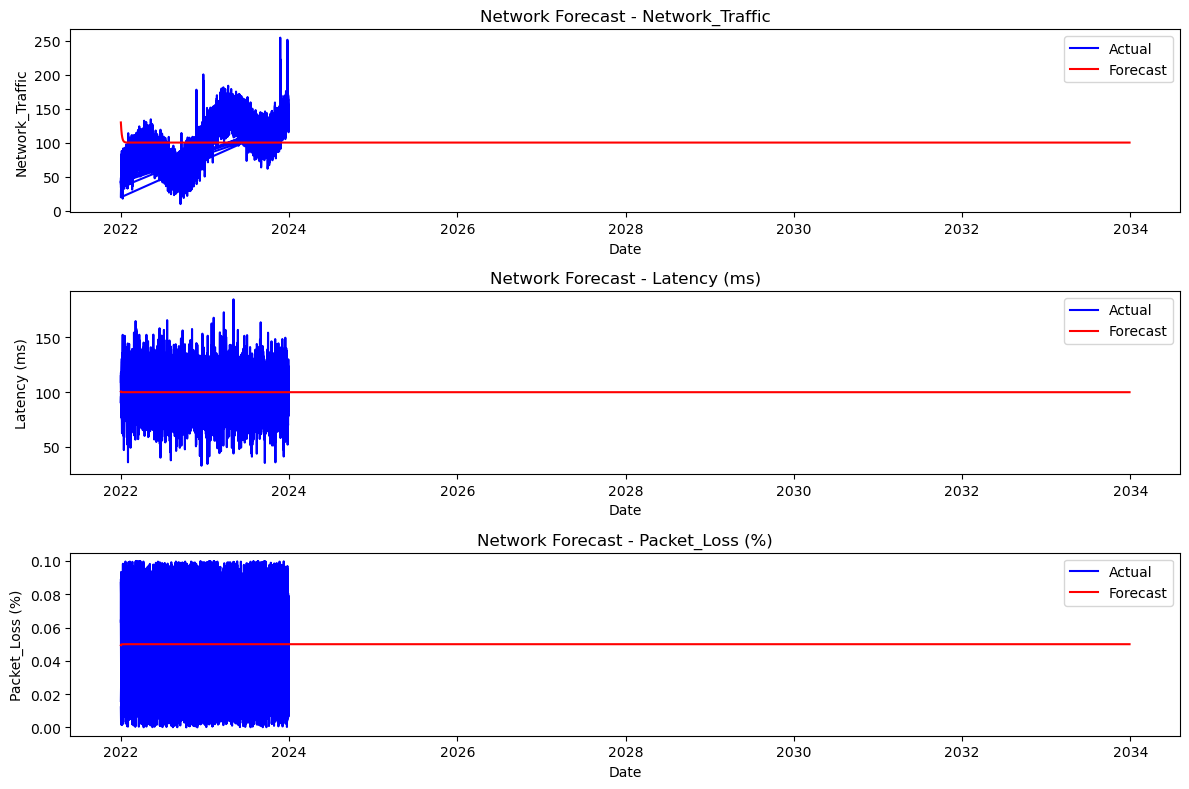

In [9]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\enhanced_network_traffic_data5.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Check the columns in the dataset
print(df.columns)

# Check for necessary columns
required_columns = ['Network_Traffic', 'Latency (ms)', 'Packet_Loss (%)']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Column '{column}' is missing from the dataset")

# Select the target columns
columns = required_columns

# Normalize the data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(df[columns])
data1_df = pd.DataFrame(data1, columns=columns, index=df.index)

# Split the data into training and testing sets
training_size = round(len(data1) * 0.80)
print("Training size:", training_size)

train_data = data1_df[:training_size]
test_data = data1_df[training_size:]

# Train the VAR model
model = VAR(train_data)
model_fit = model.fit()

# Forecast using the trained VAR model
forecast_steps = len(test_data)  # Forecast for the length of the test data
forecast = model_fit.forecast(train_data.values[-model_fit.k_ar:], steps=forecast_steps)
forecast_dates = pd.date_range(start=df.index[training_size], periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=columns)

# Convert normalized forecasts back to original scale
def inverse_transform(data, scaler, columns):
    return pd.DataFrame(scaler.inverse_transform(data), columns=columns, index=data.index)

forecast_ori = inverse_transform(forecast_df, Ms, columns)
test_data_ori = inverse_transform(test_data, Ms, columns)

# Evaluate performance
def evaluate_forecast(actual, forecast):
    actual_values = actual.values
    forecast_values = forecast.values
    rmse = mean_squared_error(actual_values, forecast_values, squared=False)
    mape = mean_absolute_percentage_error(actual_values, forecast_values)
    return rmse, mape

# Evaluate each variable
for column in columns:
    rmse, mape = evaluate_forecast(test_data_ori[[column]], forecast_ori[[column]])
    print(f"{column} - RMSE: {rmse}, MAPE: {mape}")

# Plot forecast
def plot_forecast(actual, forecast, title, columns):
    plt.figure(figsize=(12, 8))
    for column in columns:
        plt.subplot(len(columns), 1, columns.index(column) + 1)
        plt.plot(actual.index, actual[column], label='Actual', color='blue')
        plt.plot(forecast.index, forecast[column], label='Forecast', color='red')
        plt.title(f"{title} - {column}")
        plt.xlabel("Date")
        plt.ylabel(column)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Plot actual vs forecast for each variable
plot_forecast(test_data_ori, forecast_ori, "Network Forecast", columns)

# Save forecast to CSV
forecast_file_path = r"C:\New folder\Hope AI\Time Series\TSA_Network\VAR_Forecast.csv"
forecast_ori.to_csv(forecast_file_path, index=True)
